# Clustering jerárquico

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
%matplotlib inline

In [5]:
url = 'https://raw.githubusercontent.com/rociochavezmx/Rocio-Chavez-youtube-Files/master/Ejemplo%20Estudiantes.csv'

estudiantes = pd.read_csv(url, index_col=0, engine='python')
estudiantes

,Matematicas,Ciencias,Espanol,Historia,Deportes
Estudiante,,,,,
Lucia,7.0,6.5,9.2,8.6,8.0
Pedro,7.5,9.4,7.3,7.0,7.0
Ines,7.6,9.2,8.0,8.0,7.5
Luis,5.0,6.5,6.5,7.0,9.0
Andres,6.0,6.0,7.8,8.9,7.3
Ana,7.8,9.6,7.7,8.0,6.5
Carlos,6.3,6.4,8.2,9.0,7.2
Jose,7.9,9.7,7.5,8.0,6.0
Sonia,6.0,6.0,6.5,5.5,8.7


In [6]:
estudiantes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, Lucia to Maria
Data columns (total 5 columns):
Matematicas    10 non-null float64
Ciencias       10 non-null float64
Espanol        10 non-null float64
Historia       10 non-null float64
Deportes       10 non-null float64
dtypes: float64(5)
memory usage: 480.0+ bytes


In [7]:
calificaciones = estudiantes.iloc[:, :5].values
calificaciones

array([[7. , 6.5, 9.2, 8.6, 8. ],
       [7.5, 9.4, 7.3, 7. , 7. ],
       [7.6, 9.2, 8. , 8. , 7.5],
       [5. , 6.5, 6.5, 7. , 9. ],
       [6. , 6. , 7.8, 8.9, 7.3],
       [7.8, 9.6, 7.7, 8. , 6.5],
       [6.3, 6.4, 8.2, 9. , 7.2],
       [7.9, 9.7, 7.5, 8. , 6. ],
       [6. , 6. , 6.5, 5.5, 8.7],
       [6.8, 7.2, 8.7, 9. , 7. ]])

# **Creando el dendrograma del clusteing jerárquico **

In [8]:
#Utilizamos el método ward para agrupar los clusters
clustering_jerarquico = linkage(calificaciones, 'ward')

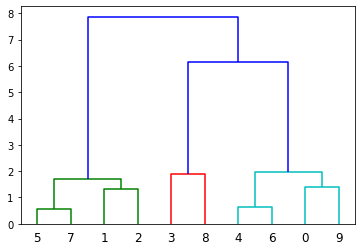

In [9]:
dendrogram = sch.dendrogram(clustering_jerarquico)

# Asignando los clusters a cada estudiante

In [10]:
# t es la altura a la que haremos el corte al dendrograma
clusters = fcluster(clustering_jerarquico, t=2, criterion='distance')

In [11]:
clusters

array([3, 1, 1, 2, 3, 1, 3, 1, 2, 3], dtype=int32)

# Agregando la clasificación al archivo original

In [13]:
estudiantes['Clustering jerarquico'] = clusters
estudiantes

,Matematicas,Ciencias,Espanol,Historia,Deportes,Clustering jerarquico
Estudiante,,,,,,
Lucia,7.0,6.5,9.2,8.6,8.0,3
Pedro,7.5,9.4,7.3,7.0,7.0,1
Ines,7.6,9.2,8.0,8.0,7.5,1
Luis,5.0,6.5,6.5,7.0,9.0,2
Andres,6.0,6.0,7.8,8.9,7.3,3
Ana,7.8,9.6,7.7,8.0,6.5,1
Carlos,6.3,6.4,8.2,9.0,7.2,3
Jose,7.9,9.7,7.5,8.0,6.0,1
Sonia,6.0,6.0,6.5,5.5,8.7,2


# Grabamos en el disco duro con los culsters asignados

In [14]:
estudiantes.to_csv('Datasets_ML/estudiantes clustering jerarquico.csv')